# A neural network for a binary classification

## import library

In [52]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm
import os
from tqdm import tqdm

## load data

In [53]:
directory_data  = './sample_data/'
filename_data   = 'assignment_03_data.npz'
path_data       = os.path.join(directory_data, filename_data) 
data            = np.load(path_data)

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

In [54]:
print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training image :', x_train.shape[0])
print('height of training image :', x_train.shape[1])
print('width of training image :', x_train.shape[2])
print('*************************************************')
print('number of testing image :', x_test.shape[0])
print('height of testing image :', x_test.shape[1])
print('width of testing image :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (10000, 28, 28)
size of y_train : (10000,)
*************************************************
size of x_test : (1800, 28, 28)
size of y_test : (1800,)
*************************************************
number of training image : 10000
height of training image : 28
width of training image : 28
*************************************************
number of testing image : 1800
height of testing image : 28
width of testing image : 28
*************************************************


## convert data into numpy array

In [55]:
print(type(x_train), type(x_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [56]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test  = np.asarray(x_test)
y_test  = np.asarray(y_test)

In [57]:
print(type(x_train))

<class 'numpy.ndarray'>


## plot grey image

In [58]:
def plot_image(title, data):

    nRow = 2
    nCol = 4
    size = 4
    
    fig, axes = plt.subplots(nRow, nCol, figsize=(size * nCol, size * nRow))
    fig.suptitle(title, fontsize=16)
    
    for i in range(nRow):
        for j in range(nCol):

            k = i * nCol + j
            axes[i, j].imshow(data[k], cmap='gray', vmin=0, vmax=1)

    plt.tight_layout()
    plt.show()

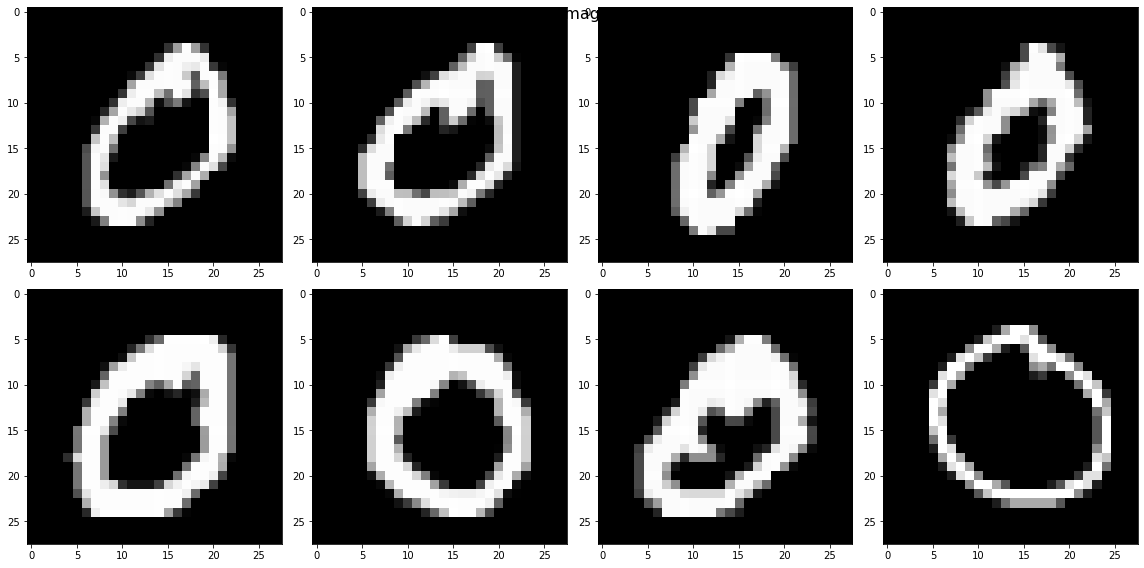

In [59]:
plot_image('training image for 0', x_train)

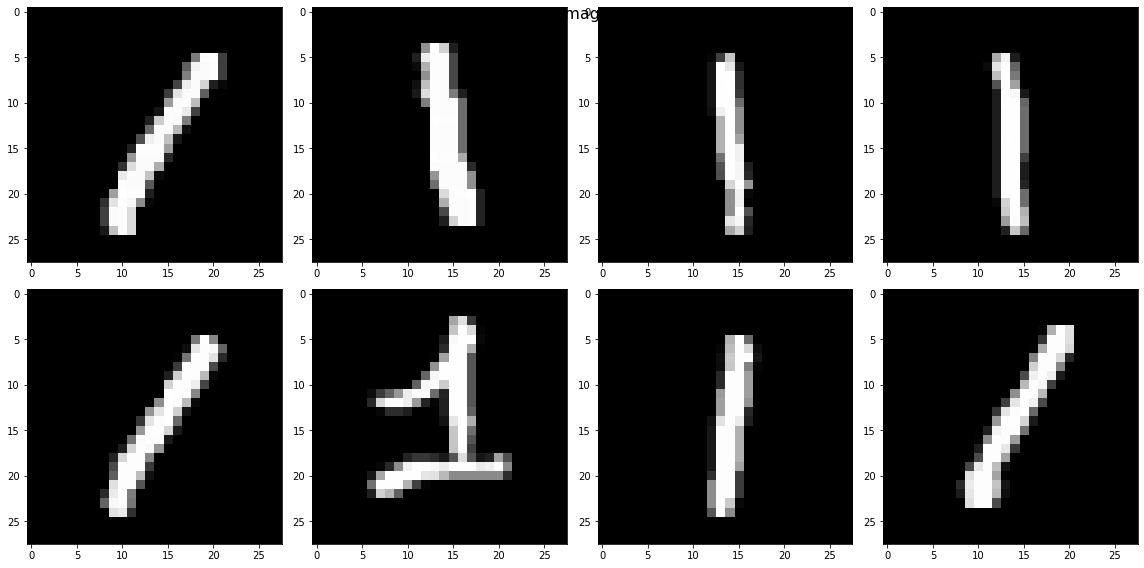

In [60]:
plot_image('training image for 1', x_train[5000:,:,:])

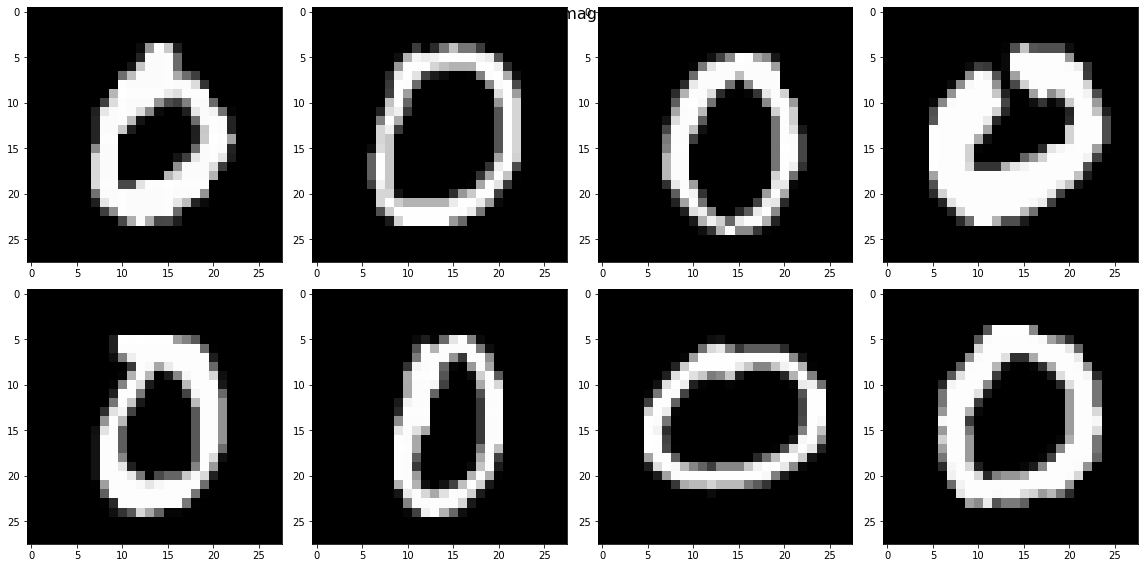

In [61]:
plot_image('testing image for 0', x_test)

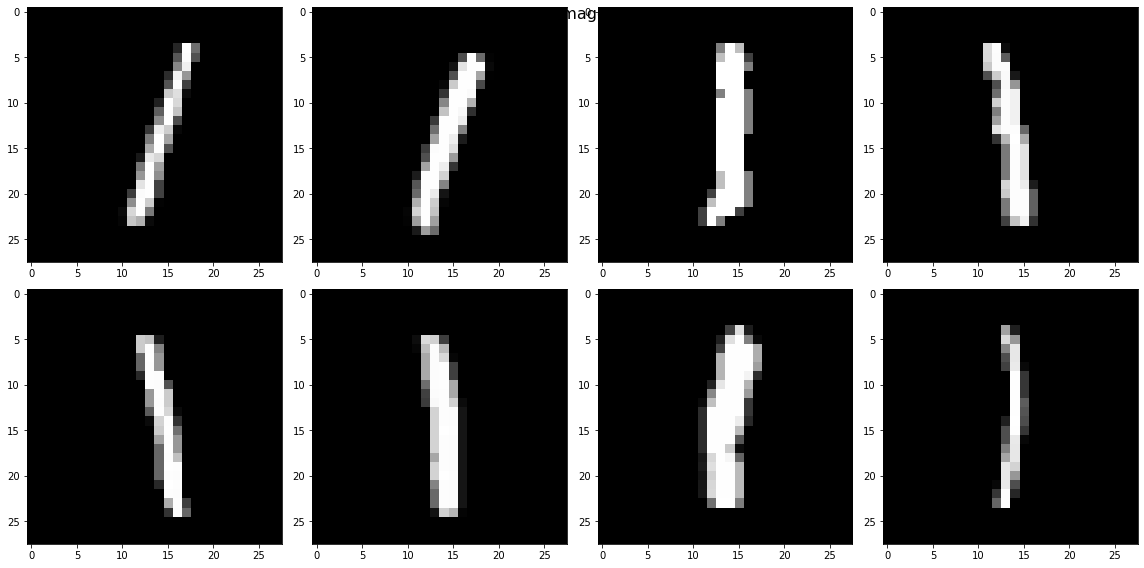

In [62]:
plot_image('testing image for 1', x_test[900:])

## reshape input data

- vectorize input image matrices into vectors (row-major order)

In [63]:
vec_x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vec_x_test  = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [64]:
print('size of training input :', vec_x_train.shape)
print('size of training output :', y_train.shape)

print('size of testing input :', vec_x_test.shape)
print('size of testing output :', y_test.shape)

size of training input : (10000, 784)
size of training output : (10000,)
size of testing input : (1800, 784)
size of testing output : (1800,)


In [65]:
# (10000, 784)에서 (784, 10000)으로  전치행렬화
x_train = vec_x_train.transpose()
x_test  = vec_x_test.transpose()

length_data         = x_train.shape[0]
number_data_train   = x_train.shape[1]
number_data_test    = x_test.shape[1]

y_train = y_train.reshape(1, number_data_train)
y_test = y_test.reshape(1, number_data_test)

In [66]:
print(x_train[:, 0].shape)
print(y_train.dtype)

(784,)
float64


In [67]:
print('size of training input :', x_train.shape)
print('size of training output :', y_train.shape)

print('size of testing input :', x_test.shape)
print('size of testing output :', y_test.shape)

print('number of training data :', number_data_train)
print('number of testing data :', number_data_test)

size of training input : (784, 10000)
size of training output : (1, 10000)
size of testing input : (784, 1800)
size of testing output : (1, 1800)
number of training data : 10000
number of testing data : 1800


## reshape the ground truth

In [68]:
print( type(np.where(y_train == 0)))
print( type(np.where(y_train == 0)[0]))
print(np.where(y_train == 1)[0])
print(np.where(y_train == 1)[1])

<class 'tuple'>
<class 'numpy.ndarray'>
[0 0 0 ... 0 0 0]
[5000 5001 5002 ... 9997 9998 9999]


In [69]:
# [0]을 해준 것은 위와 같이, np.where()이 조건을 만족하는 인덱스를 담은 ndarray를 0번 인덱스에 두고 튜플로 감싸 return해주기 때문
index_train_0 = np.where(y_train == 0)[0]
index_train_1 = np.where(y_train == 1)[0]

index_test_0 = np.where(y_test == 0)[0]
index_test_1 = np.where(y_test == 1)[0]

In [70]:
print('size of ground truth for 0 in the training :', index_train_0.shape)
print('size of ground truth for 1 in the training :', index_train_1.shape)

print('size of ground truth for 0 in the testing :', index_test_0.shape)
print('size of ground truth for 1 in the testing :', index_test_1.shape)

size of ground truth for 0 in the training : (5000,)
size of ground truth for 1 in the training : (5000,)
size of ground truth for 0 in the testing : (900,)
size of ground truth for 1 in the testing : (900,)


## initialize the neural network

- neural network consists of fullly connected linear layer followed by sigmoid activation function
- the size of the fully connected layer is input 784 and output 1

## initialize the weights for the fully connected layer

- create one matrix for the weights

In [71]:
#784
size_input  = length_data 
size_output = 1
# input으로 (,784)의 이미지가 10000개 들어오므로, weight는 (1,784)의 shape를 가져야한다
weight = np.ones((size_output, size_input))

In [72]:
print('size of the weight :', weight.shape)

size of the weight : (1, 784)


## define neural network 

### define sigmoid function 

In [73]:
input_test = np.array([range(1, 11)])
print(input_test)
print(input_test.shape)

[[ 1  2  3  4  5  6  7  8  9 10]]
(1, 10)


In [74]:
def activation_sigmoid(input):

# ================================================== 
# fill up the blank
#
    output = 1 / ( 1 + np.exp(-input))
#
# ================================================== 
    return output 

In [75]:
def derivative_sigmoid(input):

# ================================================== 
# fill up the blank
#
    # sigmoid의 미분은 s' = s ( 1 - s ) 이다
    sig = activation_sigmoid(input) 
    # *로 element-wise multiplication 해야한다.
    output = sig * (1 - sig) 
#
# ================================================== 
    return output

### define the layer

- $n$ : the number of data
- input : $784 \times n$
- output : $1 \times n$

In [76]:
def layer_fully_connected(input, weight):

# ================================================== 
# fill up the blank
#
    # weight는 (1,784)의 shape를 가짐
    output = weight.dot(input)
#
# ================================================== 
    return output

## define forward propagation

In [77]:
def compute_prediction(input, weight):

# ================================================== 
# fill up the blank
#
    layer_output = layer_fully_connected(input, weight)
    prediction  = activation_sigmoid(layer_output)
#
# ==================================================     
    return prediction 

## define the loss function

- cross entropy between the ground truth and the prediction

---


- cross entropy : $-y \log(h) - (1-y) \log(1-h)$
  - $y$ : grount truth
  - $h$ : prediction
- output dimension : $1 \times 1$

In [78]:
def compute_loss(prediction, label):

# ================================================== 
# fill up the blank
#
    loss = -label * np.log(prediction) - (1 - label) * np.log(1 - prediction)
#
# ==================================================
    return loss

## compute the accuracy

- note that iterations over the input data are not allowed inside the function

In [79]:
def compute_accuracy(prediction, label):

# ================================================== 
# fill up the blank
#    
    # prediction을 이루는, sigmoid를 거친 값들은 모두 0과 1사이에 위치하는데,np의 반올림은 0.5를 0으로 처리하고 1.5는 2로 처리하기에 아래와 같이 구현
    rounds_prediction = np.around(prediction + 1) - 1
    count_element = np.unique(rounds_prediction == label, return_counts = True)
    count_true = 0
    if count_element[0][0]:
      count_true = count_element[1][0]
    else:
      count_true = count_element[1][1]
    print("true count = ", count_true, "label.shape[1] = ", label.shape[1])
    accuracy = count_true / label.shape[1]
#
# ==================================================
    return accuracy

## compute the gradient with respect to the weights

- note that iterations over the input data are not allowed inside the function
- size of input : $m \times n$
- size of label : $1 \times n$
- size of prediction : $1 \times n$
- $n$ denotes the number of data
- $m$ denotes the length of each data

In [80]:
def compute_gradient_weight(input, label, prediction):

# ================================================== 
# fill up the blank
#    
    # 우리는 w를 update해야하므로, dl / dw 를 구해야함 dl / dw = (dl / dh) * (dh / dw)
    # cross entropy : l = −𝑦log(ℎ)−(1−𝑦)log(1−ℎ)
    # dl / dh = -y / h + (1-y) / (1-h)
    # dh / dw = h(1-h)x   ... x는 인풋값
    # 따라서 dl/dw = (h - y)x
    # (1, 10000)  input은 (784, 10000) 
    gradient = input * (prediction - label)
    # return 값의 shapedms (784, 10000)
#
# ==================================================
    return gradient

## gradient descent algorithm

- hyper-parameters

In [81]:
number_iteration    = 500
learning_rate       = 0.01
weight              = weight * 0.01

## variables for storing intermediate results

In [82]:
accuracy_train  = np.zeros(number_iteration)
accuracy_test   = np.zeros(number_iteration)

loss_train_mean = np.zeros(number_iteration)
loss_train_std  = np.zeros(number_iteration)
loss_test_mean  = np.zeros(number_iteration)
loss_test_std   = np.zeros(number_iteration)

prediction_train_0_mean = np.zeros(number_iteration)
prediction_train_0_std  = np.zeros(number_iteration)
prediction_train_1_mean = np.zeros(number_iteration)
prediction_train_1_std  = np.zeros(number_iteration)
prediction_test_0_mean  = np.zeros(number_iteration)
prediction_test_0_std   = np.zeros(number_iteration)
prediction_test_1_mean  = np.zeros(number_iteration)
prediction_test_1_std   = np.zeros(number_iteration)

## run the gradient descent algorithm

In [83]:
for i in tqdm(range(number_iteration)):

# ================================================== 
# fill up the blank
#    weight를 update gradient descent

    # prediction 먼저 수행
    #(1, 784) dot (784, 10000) -> (1, 10000)
    train_prediction = compute_prediction(x_train, weight)
    #(1, 784) dot (784, 1800) -> (1, 1800)
    test_prediction = compute_prediction(x_test, weight)

    # loss 
    # 둘다 (1, 10000) -> (1, 10000)
    train_loss = compute_loss(train_prediction, y_train)
    # 둘다 (1, 1800) -> (1, 1800)
    test_loss = compute_loss(test_prediction, y_test)

    # accuracy
    train_accuracy = compute_accuracy(train_prediction, y_train)
    test_accuracy = compute_accuracy(test_prediction, y_test)

    # gradient descent
    # 행 별 합 연산후, (1,784)로 reshape
    weight -= compute_gradient_weight(x_train, y_train, train_prediction).sum(axis=1).reshape(1, x_train.shape[0]) * learning_rate / x_train.shape[1] 


#
# ==================================================
    accuracy_train[i]   = train_accuracy
    accuracy_test[i]    = test_accuracy
    
    loss_train_mean[i]  = np.mean(train_loss)
    loss_train_std[i]   = np.std(train_loss)
    loss_test_mean[i]   = np.mean(test_loss)
    loss_test_std[i]    = np.std(test_loss)

    prediction_train_0_mean[i]  = np.mean(train_prediction[0, :5000])
    prediction_train_0_std[i]   = np.std(train_prediction[0, :5000])
    prediction_train_1_mean[i]  = np.mean(train_prediction[0, 5000:])
    prediction_train_1_std[i]   = np.std(train_prediction[0, 5000:])
    prediction_test_0_mean[i]   = np.mean(test_prediction[0, :900])
    prediction_test_0_std[i]    = np.std(test_prediction[0, :900])
    prediction_test_1_mean[i]   = np.mean(test_prediction[0, 900:])
    prediction_test_1_std[i]    = np.std(test_prediction[0, 900:])

  0%|          | 0/500 [00:00<?, ?it/s]

true count =  5000 

  0%|          | 2/500 [00:00<00:36, 13.66it/s]

label.shape[1] =  10000
true count =  900 label.shape[1] =  1800
true count =  5000 label.shape[1] =  10000
true count =  900 label.shape[1] =  1800
true count =  5000 label.shape[1] =  10000
true count =  900 label.shape[1] =  1800
true count =  5000 label.shape[1] =  10000
true count =  900 label.shape[1] =  1800


  1%|          | 6/500 [00:00<00:29, 16.77it/s]

true count =  5000 label.shape[1] =  10000
true count =  900 label.shape[1] =  1800
true count =  5000 label.shape[1] =  10000
true count =  900 label.shape[1] =  1800
true count =  5617 label.shape[1] =  10000
true count =  1030 label.shape[1] =  1800
true count =  7658 label.shape[1] =  10000
true count =  1417 label.shape[1] =  1800


  2%|▏         | 10/500 [00:00<00:29, 16.67it/s]

true count =  8983 label.shape[1] =  10000
true count =  1662 label.shape[1] =  1800
true count =  9506 label.shape[1] =  10000
true count =  1746 label.shape[1] =  1800
true count =  9735 label.shape[1] =  10000
true count =  1774 label.shape[1] =  1800
true count =  9837 label.shape[1] =  10000
true count =  1787 label.shape[1] =  1800


  3%|▎         | 14/500 [00:00<00:30, 15.86it/s]

true count =  9882 label.shape[1] =  10000
true count =  1790 label.shape[1] =  1800
true count =  9917 label.shape[1] =  10000
true count =  1795 label.shape[1] =  1800
true count =  9927 label.shape[1] =  10000
true count =  1797 label.shape[1] =  1800
true count =  9937 label.shape[1] =  10000
true count =  1797 label.shape[1] =  1800


  4%|▎         | 18/500 [00:01<00:30, 15.57it/s]

true count =  9944 label.shape[1] =  10000
true count =  1797 label.shape[1] =  1800
true count =  9948 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9950 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9950 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


  4%|▍         | 22/500 [00:01<00:29, 16.47it/s]

true count =  9950 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9950 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9951 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9952 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


  5%|▌         | 26/500 [00:01<00:27, 16.95it/s]

true count =  9953 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9953 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9955 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9955 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


  6%|▌         | 30/500 [00:01<00:27, 16.88it/s]

true count =  9956 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9956 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9956 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9956 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


  7%|▋         | 34/500 [00:02<00:27, 16.67it/s]

true count =  9955 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9954 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9954 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9954 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


  8%|▊         | 38/500 [00:02<00:28, 16.28it/s]

true count =  9954 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9954 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9955 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9956 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


  8%|▊         | 42/500 [00:02<00:27, 16.78it/s]

true count =  9957 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9957 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9957 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9957 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


  9%|▉         | 46/500 [00:02<00:26, 16.94it/s]

true count =  9956 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9956 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9956 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9956 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 10%|█         | 50/500 [00:03<00:28, 15.52it/s]

true count =  9955 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9955 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9955 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9955 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 11%|█         | 54/500 [00:03<00:27, 16.32it/s]

true count =  9955 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9955 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9955 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9955 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 12%|█▏        | 58/500 [00:03<00:26, 16.94it/s]

true count =  9955 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9955 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9955 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9956 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 12%|█▏        | 62/500 [00:03<00:25, 17.09it/s]

true count =  9956 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9956 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9956 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9956 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 13%|█▎        | 66/500 [00:04<00:26, 16.46it/s]

true count =  9957 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9958 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9958 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9958 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 14%|█▍        | 70/500 [00:04<00:25, 16.95it/s]

true count =  9958 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9958 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9958 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9957 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 15%|█▍        | 74/500 [00:04<00:25, 16.54it/s]

true count =  9958 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9958 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9958 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9959 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 16%|█▌        | 78/500 [00:04<00:25, 16.79it/s]

true count =  9959 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 16%|█▋        | 82/500 [00:04<00:25, 16.44it/s]

true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 17%|█▋        | 86/500 [00:05<00:25, 16.50it/s]

true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 18%|█▊        | 92/500 [00:05<00:23, 17.29it/s]

true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 19%|█▉        | 96/500 [00:05<00:23, 17.50it/s]

true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 20%|██        | 100/500 [00:05<00:22, 17.73it/s]

true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 21%|██        | 104/500 [00:06<00:22, 17.45it/s]

true count =  9960 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 21%|██        | 106/500 [00:06<00:22, 17.54it/s]

true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 22%|██▏       | 110/500 [00:06<00:23, 16.49it/s]

true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 23%|██▎       | 114/500 [00:06<00:22, 17.21it/s]

true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800


 24%|██▎       | 118/500 [00:07<00:22, 16.71it/s]

true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1798 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 24%|██▍       | 122/500 [00:07<00:22, 16.79it/s]

true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 25%|██▌       | 126/500 [00:07<00:21, 17.31it/s]

true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 26%|██▌       | 130/500 [00:07<00:21, 17.05it/s]

true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 27%|██▋       | 134/500 [00:08<00:21, 16.94it/s]

true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 28%|██▊       | 138/500 [00:08<00:21, 17.15it/s]

true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 29%|██▉       | 144/500 [00:08<00:20, 17.29it/s]

true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 30%|██▉       | 148/500 [00:08<00:19, 17.62it/s]

true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 30%|███       | 150/500 [00:08<00:20, 17.44it/s]

true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 31%|███       | 154/500 [00:09<00:20, 16.71it/s]

true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 32%|███▏      | 158/500 [00:09<00:20, 16.68it/s]

true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 32%|███▏      | 162/500 [00:09<00:19, 16.92it/s]

true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 33%|███▎      | 166/500 [00:09<00:19, 16.86it/s]

true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 34%|███▍      | 170/500 [00:10<00:19, 16.77it/s]

true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 35%|███▍      | 174/500 [00:10<00:19, 16.56it/s]

true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 36%|███▌      | 178/500 [00:10<00:19, 16.92it/s]

true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 36%|███▋      | 182/500 [00:10<00:18, 16.87it/s]

true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9961 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 37%|███▋      | 186/500 [00:11<00:19, 16.16it/s]

true count =  9962 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9962 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9962 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9962 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 38%|███▊      | 190/500 [00:11<00:18, 16.51it/s]

true count =  9962 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9962 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9962 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 39%|███▉      | 194/500 [00:11<00:18, 16.61it/s]

true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 40%|███▉      | 198/500 [00:11<00:17, 16.94it/s]

true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 40%|████      | 202/500 [00:12<00:17, 17.20it/s]

true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 41%|████      | 206/500 [00:12<00:17, 16.77it/s]

true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 42%|████▏     | 210/500 [00:12<00:16, 17.16it/s]

true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9963 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 43%|████▎     | 214/500 [00:12<00:16, 16.97it/s]

true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 44%|████▎     | 218/500 [00:12<00:16, 17.00it/s]

true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 44%|████▍     | 222/500 [00:13<00:16, 16.95it/s]

true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 45%|████▌     | 226/500 [00:13<00:16, 16.62it/s]

true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 46%|████▋     | 232/500 [00:13<00:15, 17.32it/s]

true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 47%|████▋     | 236/500 [00:14<00:15, 17.56it/s]

true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 48%|████▊     | 238/500 [00:14<00:15, 17.17it/s]

true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 48%|████▊     | 242/500 [00:14<00:15, 16.61it/s]

true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9964 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 49%|████▉     | 246/500 [00:14<00:15, 16.03it/s]

true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 50%|█████     | 250/500 [00:14<00:15, 16.28it/s]

true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 51%|█████     | 254/500 [00:15<00:14, 16.53it/s]

true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 52%|█████▏    | 258/500 [00:15<00:15, 16.01it/s]

true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 52%|█████▏    | 262/500 [00:15<00:14, 16.38it/s]

true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 53%|█████▎    | 266/500 [00:15<00:14, 16.50it/s]

true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 54%|█████▍    | 270/500 [00:16<00:13, 16.62it/s]

true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 55%|█████▍    | 274/500 [00:16<00:13, 17.12it/s]

true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9965 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 56%|█████▌    | 280/500 [00:16<00:12, 17.30it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 56%|█████▋    | 282/500 [00:16<00:13, 16.64it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 58%|█████▊    | 288/500 [00:17<00:12, 16.55it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 58%|█████▊    | 290/500 [00:17<00:12, 16.79it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 59%|█████▉    | 294/500 [00:17<00:12, 16.87it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 60%|██████    | 300/500 [00:17<00:11, 17.39it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 60%|██████    | 302/500 [00:18<00:11, 17.34it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 61%|██████    | 306/500 [00:18<00:11, 16.49it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 62%|██████▏   | 310/500 [00:18<00:11, 16.38it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 63%|██████▎   | 314/500 [00:18<00:10, 17.11it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 64%|██████▎   | 318/500 [00:18<00:10, 17.15it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 64%|██████▍   | 322/500 [00:19<00:10, 17.32it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 65%|██████▌   | 326/500 [00:19<00:10, 17.31it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 66%|██████▌   | 330/500 [00:19<00:09, 17.14it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 67%|██████▋   | 334/500 [00:19<00:09, 17.25it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 68%|██████▊   | 338/500 [00:20<00:09, 17.42it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 68%|██████▊   | 342/500 [00:20<00:09, 17.31it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 69%|██████▉   | 346/500 [00:20<00:09, 16.57it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 70%|███████   | 350/500 [00:20<00:08, 16.85it/s]

true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9966 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 71%|███████   | 354/500 [00:21<00:08, 17.28it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 72%|███████▏  | 358/500 [00:21<00:08, 17.17it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 72%|███████▏  | 362/500 [00:21<00:08, 16.96it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 73%|███████▎  | 366/500 [00:21<00:07, 16.94it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 74%|███████▍  | 370/500 [00:22<00:07, 17.15it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 75%|███████▍  | 374/500 [00:22<00:07, 17.33it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 76%|███████▌  | 378/500 [00:22<00:07, 17.34it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 76%|███████▋  | 382/500 [00:22<00:07, 16.82it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 77%|███████▋  | 386/500 [00:22<00:06, 17.37it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 78%|███████▊  | 390/500 [00:23<00:06, 17.31it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 79%|███████▉  | 394/500 [00:23<00:06, 17.30it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 80%|███████▉  | 398/500 [00:23<00:06, 16.81it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 81%|████████  | 404/500 [00:23<00:05, 17.39it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 81%|████████  | 406/500 [00:24<00:05, 17.14it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 82%|████████▏ | 410/500 [00:24<00:05, 16.99it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 83%|████████▎ | 414/500 [00:24<00:05, 16.94it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 84%|████████▍ | 420/500 [00:24<00:04, 17.69it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 84%|████████▍ | 422/500 [00:25<00:04, 17.49it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 85%|████████▌ | 426/500 [00:25<00:04, 17.29it/s]

true count =  9967 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 86%|████████▌ | 430/500 [00:25<00:04, 16.88it/s]

true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 87%|████████▋ | 434/500 [00:25<00:04, 16.49it/s]

true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 88%|████████▊ | 438/500 [00:25<00:03, 16.52it/s]

true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 88%|████████▊ | 442/500 [00:26<00:03, 16.67it/s]

true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 89%|████████▉ | 446/500 [00:26<00:03, 16.76it/s]

true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 90%|█████████ | 450/500 [00:26<00:02, 16.75it/s]

true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9968 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 91%|█████████ | 454/500 [00:26<00:02, 16.41it/s]

true count =  9969 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9969 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9969 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9969 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 92%|█████████▏| 458/500 [00:27<00:02, 16.48it/s]

true count =  9969 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9969 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 92%|█████████▏| 462/500 [00:27<00:02, 15.84it/s]

true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count = 

 93%|█████████▎| 466/500 [00:27<00:02, 15.79it/s]

 1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] = 

 94%|█████████▎| 468/500 [00:27<00:02, 15.39it/s]

 10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 94%|█████████▍| 472/500 [00:28<00:01, 15.71it/s]

true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 95%|█████████▌| 476/500 [00:28<00:01, 16.16it/s]

true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 96%|█████████▋| 482/500 [00:28<00:01, 17.21it/s]

true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 97%|█████████▋| 484/500 [00:28<00:00, 16.58it/s]

true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 98%|█████████▊| 490/500 [00:29<00:00, 17.25it/s]

true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


 99%|█████████▉| 494/500 [00:29<00:00, 17.31it/s]

true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


100%|█████████▉| 498/500 [00:29<00:00, 17.32it/s]

true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


100%|██████████| 500/500 [00:29<00:00, 16.81it/s]

true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800
true count =  9970 label.shape[1] =  10000
true count =  1799 label.shape[1] =  1800


---

## functions for presenting the results

---

In [84]:
def function_result_01():

    title           = 'loss (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_train_mean)), loss_train_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_train_mean)), loss_train_mean - loss_train_std, loss_train_mean + loss_train_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [85]:
def function_result_02():

    title           = 'loss (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_test_mean)), loss_test_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_test_mean)), loss_test_mean - loss_test_std, loss_test_mean + loss_test_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [86]:
def function_result_03():

    title           = 'prediction for 0 (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(prediction_train_0_mean)), prediction_train_0_mean, '-', color = color_mean)
    plt.fill_between(range(len(prediction_train_0_mean)), prediction_train_0_mean - prediction_train_0_std, prediction_train_0_mean + prediction_train_0_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [87]:
def function_result_04():

    title           = 'prediction for 1 (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(prediction_train_1_mean)), prediction_train_1_mean, '-', color = color_mean)
    plt.fill_between(range(len(prediction_train_1_mean)), prediction_train_1_mean - prediction_train_1_std, prediction_train_1_mean + prediction_train_1_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [88]:
def function_result_05():

    title           = 'prediction for 0 (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(prediction_test_0_mean)), prediction_test_0_mean, '-', color = color_mean)
    plt.fill_between(range(len(prediction_test_0_mean)), prediction_test_0_mean - prediction_test_0_std, prediction_test_0_mean + prediction_test_0_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [89]:
def function_result_06():

    title           = 'prediction for 1 (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(prediction_test_1_mean)), prediction_test_1_mean, '-', color = color_mean)
    plt.fill_between(range(len(prediction_test_1_mean)), prediction_test_1_mean - prediction_test_1_std, prediction_test_1_mean + prediction_test_1_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [90]:
def function_result_07():

    title           = 'accuracy (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_train)), accuracy_train, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [91]:
def function_result_08():

    title           = 'accuracy (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_test)), accuracy_test, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [92]:
def function_result_09():

    print('final training loss = %6.5f' % (loss_train_mean[-1]))

In [93]:
def function_result_10():

    print('final testing loss = %6.5f' % (loss_test_mean[-1]))

In [94]:
def function_result_11():

    print('final training accuracy = %6.5f' % (accuracy_train[-1]))

In [95]:
def function_result_12():

    print('final testing accuracy = %6.5f' % (accuracy_test[-1]))

---

## results 

---


################################################################################
#
# RESULT # 01
#
################################################################################



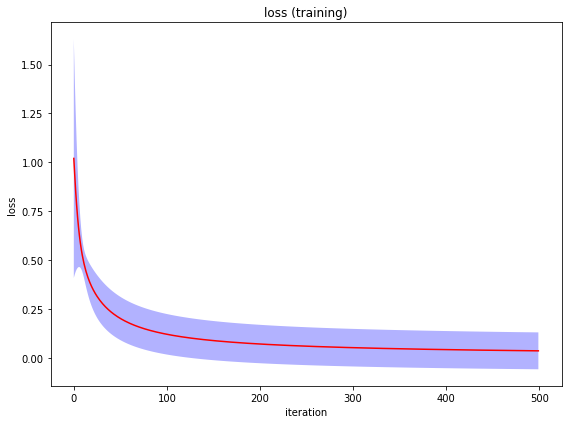


################################################################################
#
# RESULT # 02
#
################################################################################



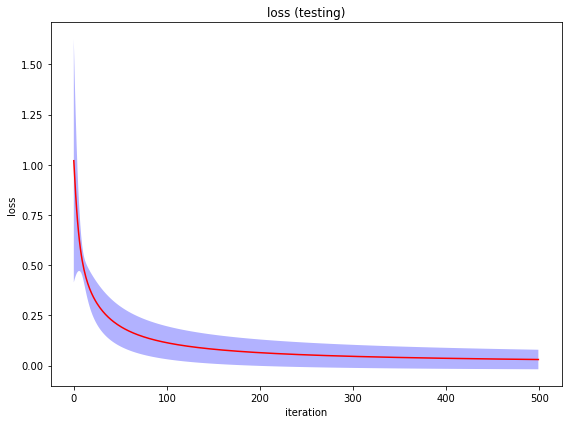


################################################################################
#
# RESULT # 03
#
################################################################################



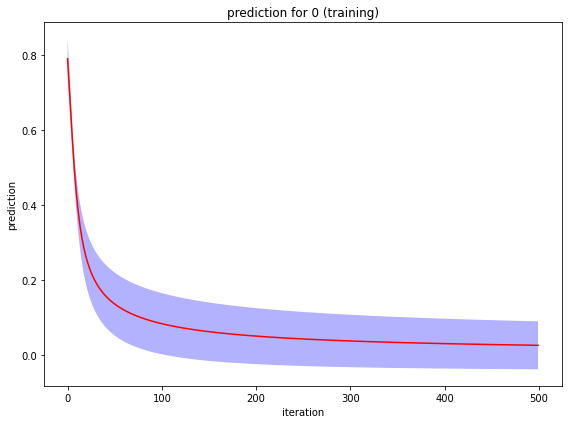


################################################################################
#
# RESULT # 04
#
################################################################################



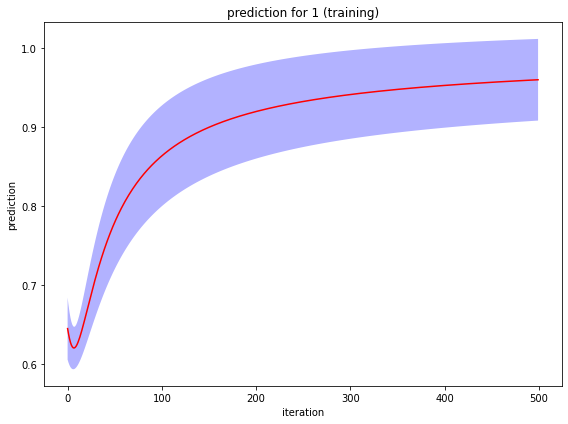


################################################################################
#
# RESULT # 05
#
################################################################################



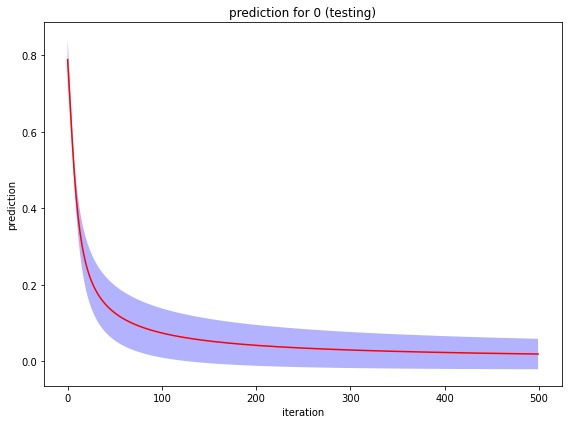


################################################################################
#
# RESULT # 06
#
################################################################################



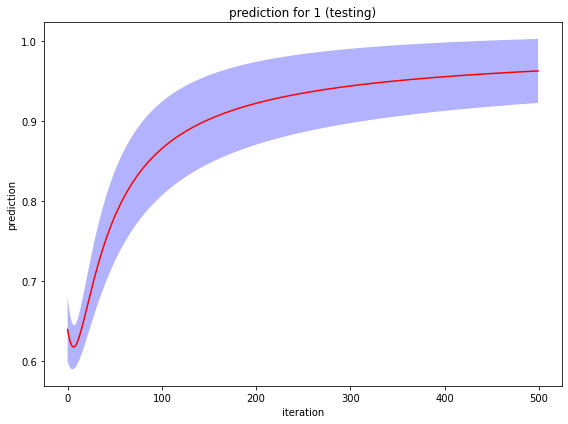


################################################################################
#
# RESULT # 07
#
################################################################################



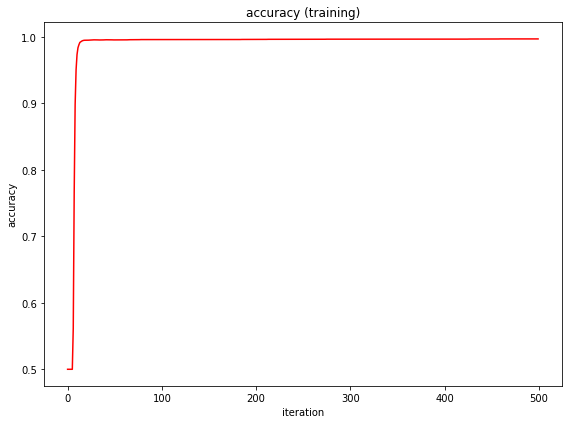


################################################################################
#
# RESULT # 08
#
################################################################################



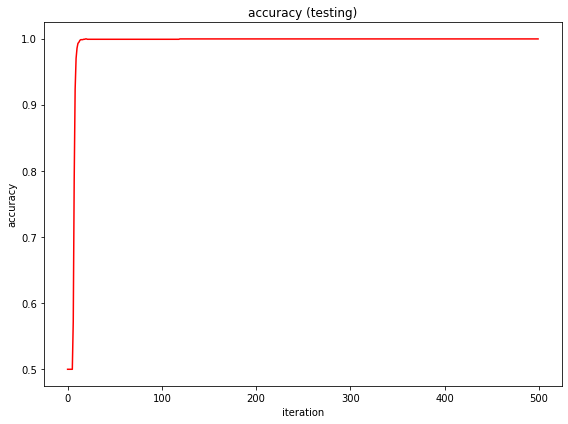


################################################################################
#
# RESULT # 09
#
################################################################################

final training loss = 0.03675

################################################################################
#
# RESULT # 10
#
################################################################################

final testing loss = 0.02988

################################################################################
#
# RESULT # 11
#
################################################################################

final training accuracy = 0.99700

################################################################################
#
# RESULT # 12
#
################################################################################

final testing accuracy = 0.99944


In [96]:
number_result = 12 

for i in range(number_result):

    title           = '# RESULT # {:02d}'.format(i+1) 
    name_function   = 'function_result_{:02d}()'.format(i+1)

    print('') 
    print('################################################################################')
    print('#') 
    print(title)
    print('#') 
    print('################################################################################')
    print('') 

    eval(name_function)